In [1]:
# K-Means Clustering

import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans

%precision 3

'%.3f'

In [2]:
billboard_data = pd.read_csv('data/input_kmc.csv')
billboard_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,billboard_id,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,22,90b91c6b8e1d3160c023b6a074133cad,I-215 and Valley View 2,10,East,36.0677,-115.192320,"Las Vegas, NV",75.0,Bulletin,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,65241,90b91c6b8e1d3160c023b6a074133cad,I-215 NL East Of Decatur/I-15 Interchange Faci...,10,East,36.0677,-115.192320,"Las Vegas, NV",75.0,Bulletin,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,25,9ffd87ae6a0f9bb07c378aafdc32f76c,I-15 and South Point,11,South,36.0072,-115.179675,"Las Vegas, NV",75.0,Bulletin,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,68676,9ffd87ae6a0f9bb07c378aafdc32f76c,I5 El @ South Point Facing South,11,South,36.0072,-115.179675,"Las Vegas, NV",75.0,Bulletin,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,33,62c1d28c8711c2d8ec5635b0e5ca4210,I-215 and Eastern,12,West,36.0221,-115.118250,"Las Vegas, NV",75.0,Bulletin,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [3]:
billboard_data.columns

Index(['id', 'billboard_id', 'name', 'directionId', 'directionName', 'lat',
       'lng', 'googlePlacesId', 'typeId', 'typeName',
       ...
       'a822', 'a823', 'a824', 'a825', 'a826', 'a827', 'a828', 'a829', 'a830',
       'a831'],
      dtype='object', length=841)

In [4]:
billboard_data.shape

(118013, 841)

In [5]:
billboard_data.dtypes

id                  int64
billboard_id       object
name               object
directionId        object
directionName      object
lat                object
lng               float64
googlePlacesId     object
typeId            float64
typeName           object
a1                float64
a2                float64
a3                float64
a4                float64
a5                float64
a6                float64
a7                float64
a8                float64
a9                float64
a10               float64
a11               float64
a12               float64
a13               float64
a14               float64
a15               float64
a16               float64
a17               float64
a18               float64
a19               float64
a20               float64
                   ...   
a802              float64
a803              float64
a804              float64
a805              float64
a806              float64
a807              float64
a808              float64
a809        

In [6]:
# Change types. 
billboard_data[['lat','lng','typeId']] = billboard_data[['lat','lng','typeId']].astype(str)
billboard_data.dtypes

id                  int64
billboard_id       object
name               object
directionId        object
directionName      object
lat                object
lng                object
googlePlacesId     object
typeId             object
typeName           object
a1                float64
a2                float64
a3                float64
a4                float64
a5                float64
a6                float64
a7                float64
a8                float64
a9                float64
a10               float64
a11               float64
a12               float64
a13               float64
a14               float64
a15               float64
a16               float64
a17               float64
a18               float64
a19               float64
a20               float64
                   ...   
a802              float64
a803              float64
a804              float64
a805              float64
a806              float64
a807              float64
a808              float64
a809        

In [7]:
# Remove some columns. 
billboard_data_loc_sub = billboard_data[['id','lat','lng','typeId']]
print(billboard_data_loc_sub)
billboard_data_aud_sub = billboard_data.iloc[:,10:]
print(billboard_data_aud_sub)

            id                 lat                  lng typeId
0           22             36.0677           -115.19232   75.0
1        65241             36.0677           -115.19232   75.0
2           25           36.007155          -115.179675   75.0
3        68676           36.007155          -115.179675   75.0
4           33            36.02213           -115.11825   75.0
5        65246            36.02213           -115.11825   75.0
6           36            36.17655  -115.16691499999999   75.0
7        65236            36.17655  -115.16691499999999   75.0
8           43            36.12325  -115.18131000000001   75.0
9        68685            36.12325  -115.18131000000001   75.0
10          47           36.174735           -115.22335   75.0
11       75103           36.174735           -115.22335   75.0
12          49            36.07989  -115.04255500000001   75.0
13       65239            36.07989  -115.04255500000001   75.0
14          50            36.07816  -115.04045500000001

In [8]:
# Concatenate those sub data. 
training_data = pd.concat([billboard_data_loc_sub, billboard_data_aud_sub], axis=1)
training_data.head()

,id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,22,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,65241,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,25,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,68676,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,33,36.02213,-115.11825,75.0,45.0,65.0,118.0,44.0,39.0,56.0,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [9]:
#  Remove some rows where typeId is equal to 0.0 or nan. 

typeId_count = training_data['typeId'].value_counts()
typeId_count

164.0    48438
171.0    25207
188.0     8492
75.0      7585
177.0     7517
184.0     4316
165.0     3404
181.0     1740
190.0     1456
0.0       1336
48.0      1189
189.0     1165
166.0     1020
94.0       979
172.0      930
168.0      612
169.0      548
180.0      455
173.0      279
109.0      266
182.0      249
187.0      228
175.0      192
131.0      108
178.0       78
174.0       73
179.0       44
170.0       29
163.0       19
66.0        13
16.0        11
167.0       11
2.0         10
151.0        6
105.0        2
176.0        2
99.0         2
nan          1
185.0        1
Name: typeId, dtype: int64

In [10]:
training_data = training_data[training_data['typeId'] != '0.0']
training_data.shape

(116677, 835)

In [11]:
training_data = training_data[training_data['typeId'] != 'nan']
training_data.shape

(116676, 835)

In [12]:
# training_data = training_data.dropna()
# training_data.shape

In [13]:
training_data = training_data.fillna(0)
training_data.shape

(116676, 835)

In [14]:
training_data.head()

,id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,22,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,65241,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,25,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,68676,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,33,36.02213,-115.11825,75.0,45.0,65.0,118.0,44.0,39.0,56.0,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [15]:
training_data.isnull().any()

id        False
lat       False
lng       False
typeId    False
a1        False
a2        False
a3        False
a4        False
a5        False
a6        False
a7        False
a8        False
a9        False
a10       False
a11       False
a12       False
a13       False
a14       False
a15       False
a16       False
a17       False
a18       False
a19       False
a20       False
a21       False
a22       False
a23       False
a24       False
a25       False
a26       False
          ...  
a802      False
a803      False
a804      False
a805      False
a806      False
a807      False
a808      False
a809      False
a810      False
a811      False
a812      False
a813      False
a814      False
a815      False
a816      False
a817      False
a818      False
a819      False
a820      False
a821      False
a822      False
a823      False
a824      False
a825      False
a826      False
a827      False
a828      False
a829      False
a830      False
a831      False
Length: 835, dtype: bool

In [16]:
training_data.isnull().sum()

id        0
lat       0
lng       0
typeId    0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
a8        0
a9        0
a10       0
a11       0
a12       0
a13       0
a14       0
a15       0
a16       0
a17       0
a18       0
a19       0
a20       0
a21       0
a22       0
a23       0
a24       0
a25       0
a26       0
         ..
a802      0
a803      0
a804      0
a805      0
a806      0
a807      0
a808      0
a809      0
a810      0
a811      0
a812      0
a813      0
a814      0
a815      0
a816      0
a817      0
a818      0
a819      0
a820      0
a821      0
a822      0
a823      0
a824      0
a825      0
a826      0
a827      0
a828      0
a829      0
a830      0
a831      0
Length: 835, dtype: int64

In [17]:
training_data = training_data.fillna(0)
training_data.isnull().sum()

id        0
lat       0
lng       0
typeId    0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
a8        0
a9        0
a10       0
a11       0
a12       0
a13       0
a14       0
a15       0
a16       0
a17       0
a18       0
a19       0
a20       0
a21       0
a22       0
a23       0
a24       0
a25       0
a26       0
         ..
a802      0
a803      0
a804      0
a805      0
a806      0
a807      0
a808      0
a809      0
a810      0
a811      0
a812      0
a813      0
a814      0
a815      0
a816      0
a817      0
a818      0
a819      0
a820      0
a821      0
a822      0
a823      0
a824      0
a825      0
a826      0
a827      0
a828      0
a829      0
a830      0
a831      0
Length: 835, dtype: int64

In [18]:
training_data_iddropped = training_data.drop('id', axis=1)

In [19]:
# Standardization

In [20]:
# Elbow curve to find the best number of clusters. Takes about 15 minutes. 

# training_data_iddropped = training_data.drop('id', axis=1)

# cost_list = []
# for i in range(1, 10): 
#     kmeans = KMeans(n_clusters=i, init='random', random_state=0)
#     kmeans.fit(training_data_iddropped)
#     cost_list.append(kmeans.inertia_)

# plt.plot(range(1,10), cost_list, marker='+')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')

In [21]:
# Learn the data. 
kmeans = KMeans(n_clusters=5)
kmeans.fit(training_data_iddropped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
# Concatenate billboards and clusters.  

cluster_predicted = kmeans.predict(training_data_iddropped)
# cluster_predicted = kmeans.predict(training_data_std)

training_data_iddropped['cluster'] = cluster_predicted
training_data_iddropped.head()

,lat,lng,typeId,a1,a2,a3,a4,a5,a6,a7,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
1,36.0677,-115.19232,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
2,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
3,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
4,36.02213,-115.11825,75.0,45.0,65.0,118.0,44.0,39.0,56.0,81.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,1


In [23]:
# Add 'id'. 
billboard_with_cluster = pd.concat([training_data['id'], training_data_iddropped], axis=1)
# Convert type decimal number string to int in 'typeId'. ("75.0" => 75)
billboard_with_cluster['typeId'] = billboard_with_cluster['typeId'].astype(float)
billboard_with_cluster['typeId'] = billboard_with_cluster['typeId'].astype(np.int64)
billboard_with_cluster.head(100)

,id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,22,36.0677,-115.19232,75,33.0,25.0,87.0,33.0,30.0,87.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
1,65241,36.0677,-115.19232,75,33.0,25.0,87.0,33.0,30.0,87.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
2,25,36.007155,-115.179675,75,79.0,33.0,125.0,69.0,73.0,195.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
3,68676,36.007155,-115.179675,75,79.0,33.0,125.0,69.0,73.0,195.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
4,33,36.02213,-115.11825,75,45.0,65.0,118.0,44.0,39.0,56.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,1
5,65246,36.02213,-115.11825,75,45.0,65.0,118.0,44.0,39.0,56.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,1
6,36,36.17655,-115.16691499999999,75,86.0,35.0,139.0,79.0,67.0,224.0,...,588.0,845.0,2710.0,1183.0,693.0,2826.0,243.0,3147.0,1011.0,1
7,65236,36.17655,-115.16691499999999,75,86.0,35.0,139.0,79.0,67.0,224.0,...,588.0,845.0,2710.0,1183.0,693.0,2826.0,243.0,3147.0,1011.0,1
8,43,36.12325,-115.18131000000001,75,139.0,64.0,201.0,110.0,107.0,271.0,...,1102.0,2118.0,6034.0,2663.0,1824.0,6387.0,481.0,7002.0,2249.0,4
9,68685,36.12325,-115.18131000000001,75,139.0,64.0,201.0,110.0,107.0,271.0,...,1102.0,2118.0,6034.0,2663.0,1824.0,6387.0,481.0,7002.0,2249.0,4


0    17926
1     5169
2    92154
3       50
4     1377
Name: cluster, dtype: int64


Text(0, 0.5, 'num of billboards')

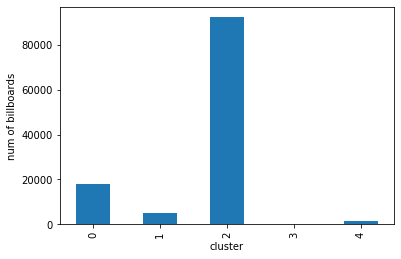

In [24]:
# Count the number of memebers in each cluster. 
labels = pd.Series(kmeans.labels_, name='cluster')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of billboards')

In [25]:
cross_cluster_typeId = billboard_with_cluster.groupby(['cluster','typeId']).size()
cross_cluster_typeId

cluster  typeId
0        16           5
         48         135
         66           9
         75        3083
         94         345
         99           2
         105          1
         109        118
         131         63
         151          1
         163          5
         164       3532
         165        920
         166        348
         167          3
         168        257
         169         88
         170          5
         171       3319
         172        240
         173         63
         174         21
         175         61
         176          1
         177        579
         178         11
         179         17
         180        150
         181        246
         182         38
                   ... 
3        164          2
         165          5
         171          1
         175          8
         177          1
         179          1
         184          2
         188          5
         190         25
4        75         109


In [26]:
cross_cluster_typeId = cross_cluster_typeId.unstack().fillna(0)
cross_cluster_typeId

typeId,2,16,48,66,75,94,99,105,109,131,...,179,180,181,182,184,185,187,188,189,190
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,5.0,135.0,9.0,3083.0,345.0,2.0,1.0,118.0,63.0,...,17.0,150.0,246.0,38.0,1502.0,0.0,0.0,2170.0,99.0,489.0
1,0.0,0.0,20.0,3.0,1265.0,292.0,0.0,0.0,42.0,9.0,...,1.0,40.0,807.0,132.0,416.0,0.0,0.0,147.0,7.0,342.0
2,10.0,6.0,1034.0,1.0,3128.0,342.0,0.0,1.0,105.0,36.0,...,23.0,256.0,90.0,2.0,2315.0,1.0,228.0,6155.0,1058.0,438.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,25.0
4,0.0,0.0,0.0,0.0,109.0,0.0,0.0,0.0,1.0,0.0,...,2.0,9.0,597.0,77.0,81.0,0.0,0.0,15.0,1.0,162.0


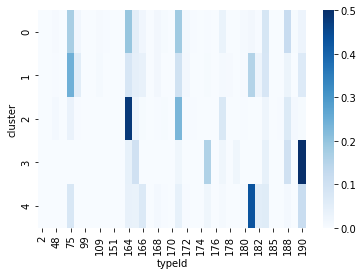

In [27]:
sns.heatmap(cross_cluster_typeId.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [28]:
# Score each cluster based on the median count for given aud. 

billboard_with_cluster.shape

(116676, 836)

In [29]:
aud_with_cluster_sub = billboard_with_cluster.drop(['id','lat','lng','typeId'], axis=1)
aud_with_cluster_sub.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,33.0,27.0,20.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
1,33.0,25.0,87.0,33.0,30.0,87.0,65.0,33.0,27.0,20.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,1
2,79.0,33.0,125.0,69.0,73.0,195.0,115.0,67.0,62.0,67.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
3,79.0,33.0,125.0,69.0,73.0,195.0,115.0,67.0,62.0,67.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,1
4,45.0,65.0,118.0,44.0,39.0,56.0,81.0,43.0,27.0,34.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,1


In [34]:
median_for_each_aud_and_cluster = aud_with_cluster_sub.groupby('cluster').median()
median_for_each_aud_and_cluster.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
cluster,,,,,,,,,,,,,,,,,,,,,
0,53.0,24.0,90.0,43.0,44.0,131.0,81.0,42.0,29.0,41.0,...,14.0,187.0,148.0,556.0,257.0,325.0,592.0,77.0,447.0,570.0
1,136.0,63.0,234.0,111.0,113.0,313.0,206.0,106.0,75.0,106.0,...,49.0,578.0,591.0,1947.0,874.0,1049.0,2016.0,287.0,1569.0,1773.0
2,10.0,4.0,17.0,7.0,7.0,24.0,14.0,7.0,5.0,7.0,...,1.0,17.0,8.0,52.0,21.0,45.0,61.0,6.0,43.0,61.0
3,1159.0,557.5,1673.0,967.5,904.0,2212.5,1783.5,936.5,657.5,754.0,...,10193.0,26093.0,7839.0,31975.5,10777.0,9324.0,34596.0,10149.5,29585.0,38956.0
4,334.0,163.0,551.0,263.0,266.0,743.0,491.0,257.0,204.0,250.0,...,183.0,2159.0,1594.0,4827.0,2172.0,2055.0,4835.0,845.0,3948.0,5488.0


In [37]:
max_s = median_for_each_aud_and_cluster.max(axis=1)
print( type(max_s))
max_s

<class 'pandas.core.series.Series'>


cluster
0      5727.0
1     16898.0
2       866.0
3    125345.0
4     35334.0
dtype: float64

In [39]:
# normalized_score = median_for_each_aud_and_cluster / max_s


,0,1,2,3,4,ASa159,ASa199,a1,a10,a100,...,a90,a91,a92,a93,a94,a95,a96,a97,a98,a99
cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Example
audience_ids = ['a44', 'a61', 'a748']
billboard_id = '05cc093be9bc7d7a4c491972e235231b'

